<a href="https://colab.research.google.com/github/tapasyamohan/GymGuide/blob/main/animal_class_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content.drive')

Mounted at /content.drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load datasets
zoo = pd.read_csv('/content.drive/MyDrive/zoo.csv')
animal_class = pd.read_csv('/content.drive/MyDrive/class.csv')


In [5]:
# EDA
print(zoo.shape)
print(zoo.columns)
print(zoo.head(5))
print(zoo.info())
print(zoo.describe(include="all"))
print("Missing Values:\n", zoo.isnull().sum())
print("Class Distribution:\n", zoo['class_type'].value_counts())

(101, 18)
Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1      

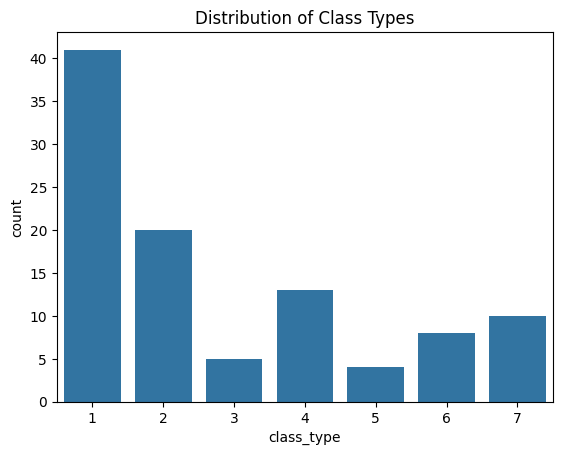

In [6]:
# Data Visualization
sns.countplot(x='class_type', data=zoo)
plt.title('Distribution of Class Types')
plt.show()

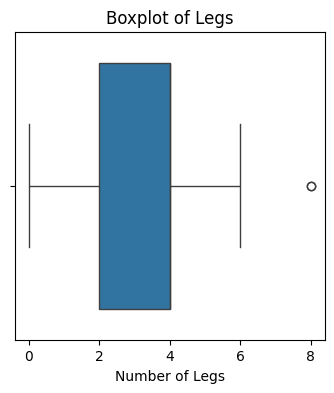

In [7]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='legs', data=zoo)
plt.title('Boxplot of Legs')
plt.xlabel('Number of Legs')
plt.show()

In [8]:
# Feature Importance using Chi-Square Test
binary_features = [
    'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
    'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize'
]

In [9]:
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(zoo[binary_features]), columns=binary_features)

In [10]:
chi_scores, p_values = chi2(scaled_features, zoo['class_type'])
feature_importance = pd.DataFrame({
    'Feature': binary_features,
    'Chi-Square Score': chi_scores,
    'p-Value': p_values
})
print("Feature Importance:\n", feature_importance.sort_values(by='Chi-Square Score', ascending=False))

Feature Importance:
      Feature  Chi-Square Score       p-Value
1   feathers         81.000000  2.220198e-15
11      fins         62.553802  1.360770e-11
3       milk         60.000000  4.501017e-11
4   airborne         49.214736  6.753324e-09
0       hair         48.833806  8.049349e-09
2       eggs         37.419719  1.458360e-06
7    toothed         37.060056  1.714052e-06
5    aquatic         29.868970  4.162830e-05
14   catsize         20.976006  1.852915e-03
8   backbone         18.000000  6.232195e-03
10  venomous         17.589904  7.343089e-03
9   breathes         17.338750  8.115690e-03
12      tail         16.880439  9.732839e-03
6   predator          5.430810  4.898584e-01
13  domestic          4.192521  6.506412e-01


In [11]:
# Remove less important features (p > 0.05)
features_to_keep = feature_importance[feature_importance['p-Value'] <= 0.05]['Feature'].tolist()
X = zoo[features_to_keep]
y = zoo['class_type']


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   toothed   101 non-null    int64
 7   backbone  101 non-null    int64
 8   breathes  101 non-null    int64
 9   venomous  101 non-null    int64
 10  fins      101 non-null    int64
 11  tail      101 non-null    int64
 12  catsize   101 non-null    int64
dtypes: int64(13)
memory usage: 10.4 KB


In [13]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 101 entries, 0 to 100
Series name: class_type
Non-Null Count  Dtype
--------------  -----
101 non-null    int64
dtypes: int64(1)
memory usage: 940.0 bytes


In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [15]:
# SVM with Hyperparameter Tuning
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [16]:
# Best Parameters and Final Model
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best parameters: {'svm__C': 100, 'svm__gamma': 0.01}
Best cross-validation score: 0.9285714285714286


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=100, gamma=0.01))])

In [17]:
# Evaluate the Model
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 97.14%
Testing Accuracy: 93.55%

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.81      0.81      0.80        31
weighted avg       0.95      0.94      0.94        31



In [18]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)
print('TP',cm[0,0])
print('TN',cm[1,1])
print('FP',cm[0,1])
print('FN',cm[1,0])

Confusion Matrix:
 [[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  2]]
TP 15
TN 3
FP 0
FN 0


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Define the 13 features that your model uses
selected_features = [
    'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'toothed', 'backbone',
    'breathes', 'venomous', 'fins', 'tail', 'catsize'
]

# Load the zoo dataframe with the relevant columns (13 features)
zoo = pd.read_csv('/content.drive/MyDrive/zoo.csv')

# Scale only the selected features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(zoo[selected_features])  # Fit scaler on 13 features

# Load the animal class file and convert it to a dictionary for mapping class numbers to class names
animal_class = pd.read_csv('/content.drive/MyDrive/class.csv')

# Dynamically create the class_map dictionary from the class.csv file
class_map = dict(zip(animal_class['Class_Number'], animal_class['Class_Type']))

#  best_model is my trained model (already fitted on the 13 features)
def predict_animal_class(model, scaler):
    # Prompt the user to enter the features (13 features now)
    print("Enter features (0 or 1 for boolean features):")
    hair = int(input("Hair (1 for yes, 0 for no): "))
    feathers = int(input("Feathers (1 for yes, 0 for no): "))
    eggs = int(input("Eggs (1 for yes, 0 for no): "))
    milk = int(input("Milk (1 for yes, 0 for no): "))
    airborne = int(input("Airborne (1 for yes, 0 for no): "))
    aquatic = int(input("Aquatic (1 for yes, 0 for no): "))
    toothed = int(input("Toothed (1 for yes, 0 for no): "))
    backbone = int(input("Backbone (1 for yes, 0 for no): "))
    breathes = int(input("Breathes (1 for yes, 0 for no): "))
    venomous = int(input("Venomous (1 for yes, 0 for no): "))
    fins = int(input("Fins (1 for yes, 0 for no): "))
    tail = int(input("Tail (1 for yes, 0 for no): "))
    catsize = int(input("Cat-sized (1 for yes, 0 for no): "))

    # Create feature vector (13 features now)
    features = np.array([hair, feathers, eggs, milk, airborne, aquatic, toothed, backbone,
                         breathes, venomous, fins, tail, catsize])

    # Preprocess the feature vector (standardize based on model's training)
    scaled_features = scaler.transform([features])  # Transform using the same scaler

    # Make prediction using the trained model
    predicted_class = model.predict(scaled_features)

    # Output the predicted class number and corresponding class name
    print(f"The predicted class number is: {predicted_class[0]}")
    class_name = class_map.get(predicted_class[0], "Unknown class")
    print(f"The predicted class name is: {class_name}")
    return predicted_class[0]

# 'best_model' is my trained SVM model
# Load the animal class file and convert it to a dictionary for mapping animal names to classes
animal_class_dict = animal_class.set_index('Class_Type').T.to_dict('list')
animal_class_dict = {
    class_type: [
        item.strip() for sublist in animals for item in str(sublist).split(', ')
    ]
    for class_type, animals in animal_class_dict.items()
}

# Function to find the class for a given animal name
def get_animal_class(animal_name):
    for animal_type, animals in animal_class_dict.items():
        if animal_name.lower() in animals:
            return animal_type
    return "Unknown class"

# Get the animal name from the user
new_animal = input("Enter the animal name: ")

# Check class of animal name from the dictionary
predicted_class = get_animal_class(new_animal)
print(f"The '{new_animal}' belongs to the class: {predicted_class}")

# If it's an unknown class, ask for features and predict
if predicted_class == "Unknown class":
    print("We don't recognize this class. Let's ask for features.")
    predicted_class = predict_animal_class(best_model, scaler)

# Final output of predicted class
print(f"Final predicted class: {predicted_class}")


Enter the animal name: buffalo
The 'buffalo' belongs to the class: Mammal
Final predicted class: Mammal
